In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm as tqdm
import cv2
import tensorflow as tf
import os

In [2]:
pip install git+https://github.com/tensorflow/examples.git

^C
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/tensorflow/examples.git 'C:\Users\Ahmad\AppData\Local\Temp\pip-req-build-_mmj1od8'
  error: RPC failed; curl 92 HTTP/2 stream 5 was not closed cleanly: CANCEL (err 8)
  error: 6286 bytes of body are still expected
  fetch-pack: unexpected disconnect while reading sideband packet
  fatal: early EOF
  fatal: fetch-pack: invalid index-pack output
ERROR: Command errored out with exit status 128: git clone -q https://github.com/tensorflow/examples.git 'C:\Users\Ahmad\AppData\Local\Temp\pip-req-build-_mmj1od8' Check the logs for full command output.


  Cloning https://github.com/tensorflow/examples.git to c:\users\ahmad\appdata\local\temp\pip-req-build-_mmj1od8


Loading The Data

In [54]:
# Fuction to count File
def Count_Files(path):
    """
    Function to count the number of files in a given Directory
    Input   : Folder Path <string>
    Returns : File Count <Integer> 
    """
    # File Traverse through given directory to get file count
    parentFolder,file_count=path,0
    for root, dirs, fileList in os.walk(parentFolder):
        file_count+=len(fileList)
    return file_count

# Dataset Source
root1="E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/"
root2="E:/Projects/Semantic Segmentation/idd20kII/gtFine/"

# print File counts
print("IDD_Segmentation Part-1:")
print("Part1 Train Samples:",Count_Files(root1+"train"))
print("Part1 Val Samples:  ",Count_Files(root1+"val"))
print("Part1 Test Samples: ",Count_Files(root1+"test"))
print("--"*13+"\n"+"--"*13)
print("Idd20kII  Part-2:")
print("Part2 Train Samples:",Count_Files(root2+"train"))
print("Part2 Val Samples:  ",Count_Files(root2+"val"))
print("Part2 Test Samples: ",Count_Files(root2+"test"))
print("--"*13+"\n"+"--"*13)
print("Total Samples:")
print("Total Train Samples:",Count_Files(root1+"train")+Count_Files(root2+"train"))
print("Total Val Samples:  ",Count_Files(root1+"val")+Count_Files(root2+"val"))
print("Total Test Samples: ",Count_Files(root1+"test")+Count_Files(root2+"test"))
print("--"*13)

IDD_Segmentation Part-1:
Part1 Train Samples: 7034
Part1 Val Samples:   1055
Part1 Test Samples:  2009
--------------------------
--------------------------
Idd20kII  Part-2:
Part2 Train Samples: 7034
Part2 Val Samples:   1055
Part2 Test Samples:  0
--------------------------
--------------------------
Total Samples:
Total Train Samples: 14068
Total Val Samples:   2110
Total Test Samples:  2009
--------------------------


In [55]:
# Function to get Images
def Get_images(path, Grey=False):
    
    """
    This Function returns Images from a given Directory
    Input  : Path <String>, Grey <Boolean>
    Return : Images <list of arrays>
    """
    
    img_files,images=sorted(os.listdir(path)),[] # list names of entries from a given path
    for i in range(len(img_files)):
        if Grey:
            image = cv2.imread(path+img_files[i],cv2.IMREAD_GRAYSCALE) # read image in greyscale by using image reader from opencv
        else:
            image=cv2.cvtColor(cv2.imread(path+img_files[i]),cv2.COLOR_BGR2RGB) # read image and convert it to RGB format 
        images.append(image)
    return images[0] if len(images)==1 else images

Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205\frame0340_leftImg8bit.jpg
Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205\frame0671_leftImg8bit.jpg
Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205\frame0821_leftImg8bit.jpg
Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205\frame1047_leftImg8bit.jpg
Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205\frame1347_leftImg8bit.jpg
Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205\frame1527_leftImg8bit.jpg
Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205\frame1647_leftImg8bit.jpg
Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205\frame1793_leftImg8bit.jpg
Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205\frame1898_leftImg8bit.jpg
Reading image: E:/Projects/Semantic Segmentation/idd20kII/leftIm

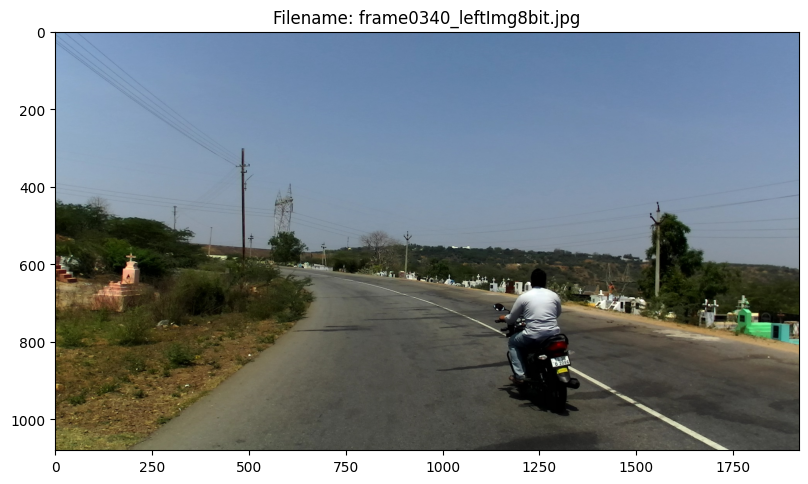

	   RGB Image Shape:  (1080, 1920, 3)
	   Red Channel:  Min Value: 0  Max Value: 255 
	 Green Channel:  Min Value: 0  Max Value: 255 
	  Blue Channel:  Min Value: 0  Max Value: 255 


In [56]:
import os
import cv2
import matplotlib.pyplot as plt

def Get_images(path, Grey=False):
    img_files, images = sorted(os.listdir(path)), []
    for i in range(len(img_files)):
        current_path = os.path.join(path, img_files[i])
        print(f"Reading image: {current_path}")
        if Grey:
            image = cv2.imread(current_path, cv2.IMREAD_GRAYSCALE)
        else:
            image = cv2.cvtColor(cv2.imread(current_path), cv2.COLOR_BGR2RGB)
        images.append((img_files[i], image))
    return images

# Try to read images and print debug information
image_list = Get_images('E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit/val/205')

# Plot the first image
filename, RGB_Image = image_list[0]
plt.figure(figsize=(9.6, 6.8))
plt.imshow(RGB_Image)
plt.title(f"Filename: {filename}")
plt.show()

# Move axis (channels) and print image info
Channel_Image = np.moveaxis(RGB_Image, -1, 0)
print("\t   RGB Image Shape: ", RGB_Image.shape)
print("\t   Red Channel:  Min Value: {0}  Max Value: {1} ".format(min(Channel_Image[0].ravel()), max(Channel_Image[0].ravel())))
print("\t Green Channel:  Min Value: {0}  Max Value: {1} ".format(min(Channel_Image[1].ravel()), max(Channel_Image[1].ravel())))
print("\t  Blue Channel:  Min Value: {0}  Max Value: {1} ".format(min(Channel_Image[2].ravel()), max(Channel_Image[2].ravel())))


In [57]:
import os

def collect_paths(base_path, subset_folders):
    paths = []

    for subset_folder in subset_folders:
        subset_path = os.path.join(base_path, subset_folder)
        
        for root, dirs, files in os.walk(subset_path):
            for file in files:
                current_path = os.path.join(root, file)
                paths.append(current_path)

    return paths

base_image_path = "E:/Projects/Semantic Segmentation/idd20kII/leftImg8bit"
base_mask_path = "E:/Projects/Semantic Segmentation/idd20kII/gtFine"

# List of subset folders (train, val, test)
subset_folders = ["train", "val", "test"]

# Collect image and mask paths for each subset
train_image_paths = collect_paths(base_image_path, ["train"])
val_image_paths = collect_paths(base_image_path, ["val"])
test_image_paths = collect_paths(base_image_path, ["test"])

train_mask_paths = collect_paths(base_mask_path, ["train"])
val_mask_paths = collect_paths(base_mask_path, ["val"])
test_mask_paths = collect_paths(base_mask_path, ["test"])

# Display lengths of each subset
print("Train Image Paths:", len(train_image_paths))
print("Val Image Paths:", len(val_image_paths))
print("Test Image Paths:", len(test_image_paths))

print("Train Mask Paths:", len(train_mask_paths))
print("Val Mask Paths:", len(val_mask_paths))
print("Test Mask Paths:", len(test_mask_paths))


Train Image Paths: 7034
Val Image Paths: 1055
Test Image Paths: 2009
Train Mask Paths: 7034
Val Mask Paths: 1055
Test Mask Paths: 0


In [58]:
def random_flip(image, mask):
    image = tf.image.flip_left_right(image)
    mask = tf.image.flip_left_right(mask)
    return image, mask


def load_image_and_mask(image_path, mask_path):
    # Use tf.io.read_file to read image and mask files
    image = tf.io.read_file(image_path)
    mask = tf.io.read_file(mask_path)

    # Decode images
    image = tf.image.decode_png(image, channels=3)
    mask = tf.image.decode_png(mask, channels=1)

    # Resize images and masks
    image = tf.image.resize(image, (256, 256))
    mask = tf.image.resize(mask, (256, 256))

    # Cast to float32 and normalize
    image = tf.cast(image, tf.float32) / 255.0
    mask = tf.cast(mask, tf.float32)

    return image, mask






Creating a binary mask using the JSON Files!

In [33]:
import subprocess
import os

# Import the binary_mask.py script
binary_mask_script = "Binary Masks.py"

output_masks_path = "E:/Projects/Semantic Segmentation/idd20kII/testMasks"

# Function to get a consistent folder structure for masks
def get_mask_output_folder(original_image_path, output_masks_path):
    relative_path = os.path.relpath(original_image_path, base_image_path)
    mask_output_folder = os.path.join(output_masks_path, relative_path)
    return os.path.splitext(mask_output_folder)[0]  # Remove file extension

# Iterate over each subset and call the script
for subset, image_paths, mask_paths in zip(["train", "val"],
                                          [train_image_paths, val_image_paths],
                                          [train_mask_paths, val_mask_paths]):
    for image_path, mask_path in zip(image_paths, mask_paths):
        output_folder = get_mask_output_folder(image_path, output_masks_path)
        os.makedirs(output_folder, exist_ok=True)

        subprocess.run(["python", binary_mask_script, mask_path, image_path, output_folder])


In [59]:
import os

def collect_mask_paths(base_path, subset_folder):
    mask_paths = []

    subset_path = os.path.join(base_path, subset_folder)

    for root, dirs, files in os.walk(subset_path):
        for file in files:
            if file.endswith(".png") or file.endswith(".jpg"):
                current_path = os.path.join(root, file)
                mask_paths.append(current_path)

    return mask_paths

# Specify your base path
base_masks_path = "E:/Projects/Semantic Segmentation/idd20kII/testMasks"

# Specify subset folders
train_subset = "train"
val_subset = "val"

# Collect mask paths for train and val subsets
train_mask_paths = collect_mask_paths(base_masks_path, train_subset)
val_mask_paths = collect_mask_paths(base_masks_path, val_subset)

# Display lengths of each subset
print("Train Mask Paths:", len(train_mask_paths))
print("Val Mask Paths:", len(val_mask_paths))


Train Mask Paths: 7017
Val Mask Paths: 1053


In [68]:
# Filter out pairs without corresponding masks
valid_train_image_paths = [img for img, mask in zip(train_image_paths, train_mask_paths) if os.path.exists(mask)]
valid_train_mask_paths = [mask for img, mask in zip(train_image_paths, train_mask_paths) if os.path.exists(mask)]

valid_val_image_paths = [img for img, mask in zip(val_image_paths, val_mask_paths) if os.path.exists(mask)]
valid_val_mask_paths = [mask for img, mask in zip(val_image_paths, val_mask_paths) if os.path.exists(mask)]

# Create datasets for training and validation
batch_size = 1

train_dataset = tf.data.Dataset.from_tensor_slices((valid_train_image_paths, valid_train_mask_paths))
train_dataset = train_dataset.map(load_image_and_mask)
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((valid_val_image_paths, valid_val_mask_paths))
val_dataset = val_dataset.map(load_image_and_mask)
val_dataset = val_dataset.shuffle(buffer_size=1000).batch(batch_size)

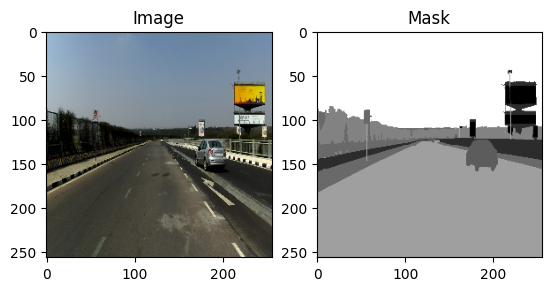

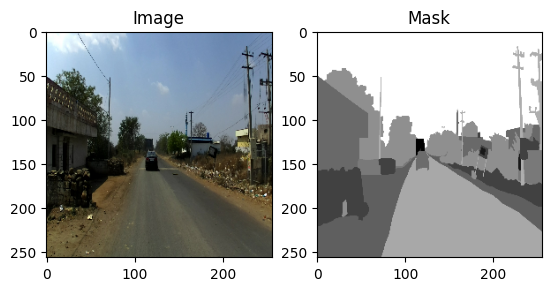

In [61]:
import matplotlib.pyplot as plt

# Take a few samples from the training dataset
sample_size = 2
sample_train_dataset = train_dataset.take(sample_size)

# Iterate over the samples and display images and masks
for image, mask in sample_train_dataset:
    # Display the image
    plt.subplot(1, 2, 1)
    plt.imshow(image[0].numpy())
    plt.title('Image')

    # Display the mask
    plt.subplot(1, 2, 2)
    plt.imshow(mask[0].numpy(), cmap='gray')
    plt.title('Mask')

    plt.show()


Making a model

In [62]:
import tensorflow as tf

def double_conv_block(x, n_filters):
    # Conv2D then ReLU activation
    x = tf.keras.layers.Conv2D(n_filters, 3, padding="same", activation="relu", kernel_initializer="he_normal")(x)
    # Conv2D then ReLU activation
    x = tf.keras.layers.Conv2D(n_filters, 3, padding="same", activation="relu", kernel_initializer="he_normal")(x)
    return x

def downsample_block(x, n_filters):
    f = double_conv_block(x, n_filters)
    p = tf.keras.layers.MaxPool2D(2)(f)
    p = tf.keras.layers.Dropout(0.3)(p)
    return f, p

def upsample_block(x, conv_features, n_filters):
    # upsample
    x = tf.keras.layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
    # concatenate
    x = tf.keras.layers.concatenate([x, conv_features])
    # dropout
    x = tf.keras.layers.Dropout(0.3)(x)
    # Conv2D twice with ReLU activation
    x = double_conv_block(x, n_filters)
    return x

def build_unet_model(input_shape=(256, 256, 3)):
    # inputs
    inputs = tf.keras.layers.Input(shape=input_shape)
    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 64)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 128)
    # 3 - downsample
    f3, p3 = downsample_block(p2, 256)
    # 4 - downsample
    f4, p4 = downsample_block(p3, 512)
    # 5 - bottleneck
    bottleneck = double_conv_block(p4, 1024)
    # decoder: expanding path - upsample
    # 6 - upsample
    u6 = upsample_block(bottleneck, f4, 512)
    # 7 - upsample
    u7 = upsample_block(u6, f3, 256)
    # 8 - upsample
    u8 = upsample_block(u7, f2, 128)
    # 9 - upsample
    u9 = upsample_block(u8, f1, 64)
    # outputs
    outputs = tf.keras.layers.Conv2D(1, 1, padding="same", activation="sigmoid")(u9)
    # U-Net model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")
    return unet_model

# Create the U-Net model with input shape (256, 256, 3)
unet_model = build_unet_model(input_shape=(256, 256, 3))

# Compile the model (you can use the same compilation code as before)
unet_model.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss="binary_crossentropy",
                   metrics="accuracy")

# Print model summary
unet_model.summary()


Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_228 (Conv2D)            (None, 256, 256, 64  1792        ['input_14[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_229 (Conv2D)            (None, 256, 256, 64  36928       ['conv2d_228[0][0]']             
                                )                                                             

In [63]:
unet_model = build_unet_model()

# Compile the model (you can use the same compilation code as before)
unet_model.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss="binary_crossentropy",
                   metrics="accuracy")


In [64]:
import tensorflow as tf
import tf2onnx
import onnx
from onnx2pytorch import ConvertModel

# Step 1: Save the TensorFlow 2.x model as an ONNX file
tf.keras.backend.set_learning_phase(0)  # Set learning phase to inference
onnx_model_path = "unet_model.onnx"

# Assuming unet_model is your TensorFlow 2.x model
unet_model = build_unet_model()

# Convert the model to ONNX
onnx_model, _ = tf2onnx.convert.from_keras(unet_model, input_signature=[tf.TensorSpec([None, 256, 256, 3])])

# Save the ONNX model
onnx.save_model(onnx_model, onnx_model_path)

# Step 2: Load the ONNX file and convert it to a PyTorch model
onnx_model_loaded = onnx.load(onnx_model_path)
pytorch_model = ConvertModel(onnx_model_loaded)

# Display PyTorch model summary
print(pytorch_model)


ConvertModel(
  (Transpose_U-Net/conv2d_266/Conv2D__1560:0): Transpose()
  (Conv_U-Net/conv2d_266/Conv2D:0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (Relu_U-Net/conv2d_266/Relu:0): ReLU(inplace=True)
  (Conv_U-Net/conv2d_267/Conv2D:0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (Relu_U-Net/conv2d_267/Relu:0): ReLU(inplace=True)
  (MaxPool_U-Net/max_pooling2d_56/MaxPool:0): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (Conv_U-Net/conv2d_268/Conv2D:0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (Relu_U-Net/conv2d_268/Relu:0): ReLU(inplace=True)
  (Conv_U-Net/conv2d_269/Conv2D:0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (Relu_U-Net/conv2d_269/Relu:0): ReLU(inplace=True)
  (MaxPool_U-Net/max_pooling2d_57/MaxPool:0): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=Fa

In [65]:
# Print the structure of the training dataset
print("Training Dataset Structure:")
for example in train_dataset.take(1):
    print("Input Shape:", example[0].shape)
    print("Mask Shape:", example[1].shape)

# Print the structure of the validation dataset
print("\nValidation Dataset Structure:")
for example in val_dataset.take(1):
    print("Input Shape:", example[0].shape)
    print("Mask Shape:", example[1].shape)


Training Dataset Structure:


Input Shape: (32, 256, 256, 3)
Mask Shape: (32, 256, 256, 1)

Validation Dataset Structure:
Input Shape: (32, 256, 256, 3)
Mask Shape: (32, 256, 256, 1)


Converting TF Dataset to Torch Dataset

In [69]:
import torch
from torch.utils.data import Dataset, DataLoader
import tensorflow as tf

# Assuming you have a PyTorch model named 'pytorch_model'
# and a TensorFlow dataset named 'tf_dataset'

# Define a custom PyTorch dataset
class TFToTorchDataset(Dataset):
    def __init__(self, tf_dataset, device):
        self.tf_dataset = tf_dataset
        self.device = device

    def __len__(self):
        # Implement the length method based on your dataset size
        return len(list(self.tf_dataset))

    def __getitem__(self, idx):
        # Convert TensorFlow tensors to PyTorch tensors and move to device
        sample = next(iter(self.tf_dataset.skip(idx).take(1)))
        image, mask = sample[0].numpy(), sample[1].numpy()
        image = torch.from_numpy(image).to(self.device)
        mask = torch.from_numpy(mask).to(self.device)

        return image, mask

# Create instances of the custom PyTorch dataset
pytorch_train_dataset = TFToTorchDataset(tf_dataset=train_dataset, device=device)
pytorch_val_dataset = TFToTorchDataset(tf_dataset=val_dataset, device=device)

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm

# Assuming your PyTorch model is already defined as 'pytorch_model'
# Make sure it's on CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pytorch_model = pytorch_model.to(device)

# Assuming 'train_dataset' and 'val_dataset' are instances of torch.utils.data.Dataset
train_dataloader = DataLoader(pytorch_train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(pytorch_val_dataset, batch_size=batch_size, shuffle=False)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(pytorch_model.parameters())

# Training loop
num_epochs = 50
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    pytorch_model.train()  # Set the model to training mode
    running_loss = 0.0

    # Create a tqdm progress bar for the training dataloader
    train_dataloader_iter = tqdm(train_dataloader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)

    for batch in train_dataloader_iter:
        inputs, targets = batch
        # No need to move inputs and targets to device, as the entire dataset is on device

        optimizer.zero_grad()
        outputs = pytorch_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Update the progress bar
        train_dataloader_iter.set_postfix(loss=loss.item())

    average_train_loss = running_loss / len(train_dataloader)
    train_losses.append(average_train_loss)

    # Validation
    pytorch_model.eval()  # Set the model to evaluation mode
    val_loss = 0.0

    with torch.no_grad():
        # Create a tqdm progress bar for the validation dataloader
        val_dataloader_iter = tqdm(val_dataloader, desc=f'Validation', leave=False)

        for batch in val_dataloader_iter:
            inputs, targets = batch
            # No need to move inputs and targets to device, as the entire dataset is on device

            outputs = pytorch_model(inputs)
            loss = criterion(outputs, targets)

            val_loss += loss.item()

            # Update the progress bar
            val_dataloader_iter.set_postfix(loss=loss.item())

    average_val_loss = val_loss / len(val_dataloader)
    val_losses.append(average_val_loss)

    # Print the losses
    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {average_train_loss}, Val Loss: {average_val_loss}")

RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 5 is not equal to len(dims) = 4

In [ ]:

# Save the trained PyTorch model
torch.save(pytorch_model.state_dict(), "trained_pytorch_model.pth")

# Plot the training curves
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()